In [6]:
from glob import glob
import pandas as pd
import numpy as np 
from  sklearn.feature_extraction.text import TfidfVectorizer
from nltk import ngrams
from collections import defaultdict

In [7]:
files = list(glob("data/stories_*.csv"))
df = pd.concat([pd.read_csv(file) for file in files] , ignore_index=True)

In [8]:
df.shape

(11000, 7)

In [9]:
df.columns

Index(['Unnamed: 0', 'id', 'title', 'date', 'author', 'story', 'topic'], dtype='object')

In [10]:
df.drop(['Unnamed: 0', 'id'], axis=1 , inplace=True)

<Axes: xlabel='topic'>

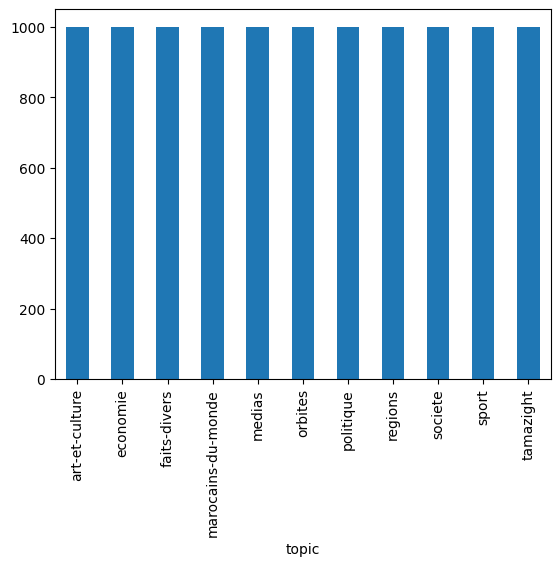

In [11]:
(df
 .topic.
 value_counts()
 .plot(kind = "bar"))

In [12]:
def get_top_ngrams(text, n, top_n):
    tokens = text.split()
    ngram_counts = defaultdict(int)
    for ngram in ngrams(tokens, n):
        ngram_str = ' '.join(ngram)
        ngram_counts[ngram_str] += 1
    sorted_ngrams = sorted(ngram_counts.items(), key=lambda x: x[1], reverse=True)
    top_ngrams = [ngram for ngram, count in sorted_ngrams[:top_n]]
    return top_ngrams

topics  = list(df.topic.unique())

each_topic_gram = []
for topic in topics:
    tmp = df[df.topic == topic].story
    each_topic = " ".join(list(tmp))
    x = get_top_ngrams(each_topic , 5 , 3)
    each_topic_gram.append((x , topic))
    

In [93]:
for i in each_topic_gram:
    print(i)

(['في تصريح لجريدة هسبريس الإلكترونية،', 'متحف محمد السادس للفنّ الحديث', 'تصريح لجريدة هسبريس الإلكترونية، أن'], 'art-et-culture')
(['وزير الاقتصاد والمالية وإصلاح الإدارة،', 'في المائة من الناتج الداخلي', 'في تصريح لجريدة هسبريس الإلكترونية،'], 'economie')
(['تحت إشراف النيابة العامة المختصة،', 'الحراسة النظرية رهن إشارة البحث', 'الذي تشرف عليه النيابة العامة'], 'faits-divers')
(['المنتدبة المكلفة بالمغاربة المقيمين بالخارج', 'المكلفة بالمغاربة المقيمين بالخارج وشؤون', 'الخارجية والتعاون الإفريقي والمغاربة المقيمين'], 'marocains-du-monde')
(['قراءة مواد بعض الجرائد الورقية', 'بعض الجرائد الورقية الخاصة بيوم', 'مواد بعض الجرائد الورقية الخاصة'], 'medias')
(['النبي صلى الله عليه وسلم', 'في تصريح لجريدة هسبريس الإلكترونية،', 'الشؤون الخارجية والتعاون الإفريقي والمغاربة'], 'orbites')
(['الشؤون الخارجية والتعاون الإفريقي والمغاربة', 'الخارجية والتعاون الإفريقي والمغاربة المقيمين', 'وزير الشؤون الخارجية والتعاون الإفريقي'], 'politique')
(['في تصريح لجريدة هسبريس الإلكترونية،', 'عند الساعة 

In [14]:
df.isna().sum()

title     0
date      0
author    0
story     0
topic     0
dtype: int64

In [72]:
topics_  = list(df.topic.unique())
lengths_dic = {}
for topic in topics:
    tmp = df[df.topic == topic].story
    lengths = np.mean(tmp.apply(lambda x : len(x)))
    lengths_dic[topic] = lengths
df_len = pd.DataFrame({"topics" : lengths_dic.keys() , "avg_len" : lengths_dic.values()})

<BarContainer object of 11 artists>

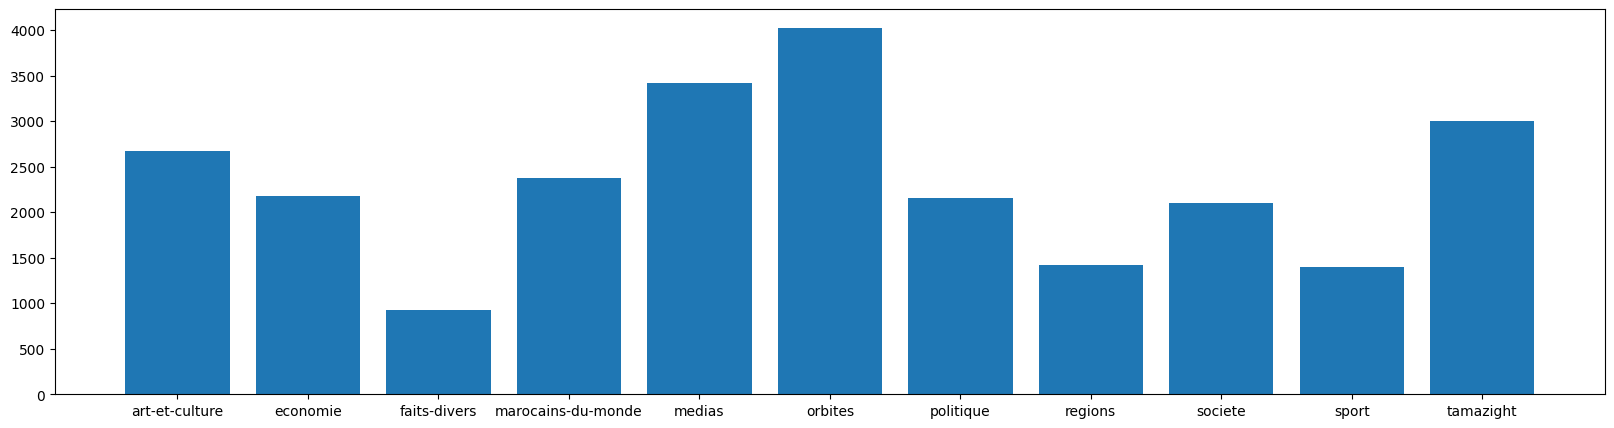

In [84]:
plt.figure(figsize=(20 , 5))
plt.bar(x = df_len.topics ,  height=df_len.avg_len)

In [66]:
topics  = list(df.topic.unique())
lengths_word_dic = {}
for topic in topics:
    tmp = df[df.topic == topic].story
    lengths = np.mean(tmp.apply(lambda x : len(x.split())))
    lengths_word_dic[topic] = lengths
df_len_word = pd.DataFrame({"topics" : lengths_word_dic.keys() , "avg_len_word" : lengths_word_dic.values()})

In [88]:
df_len_word.sort_values(by="avg_len_word" , inplace=True)

<BarContainer object of 11 artists>

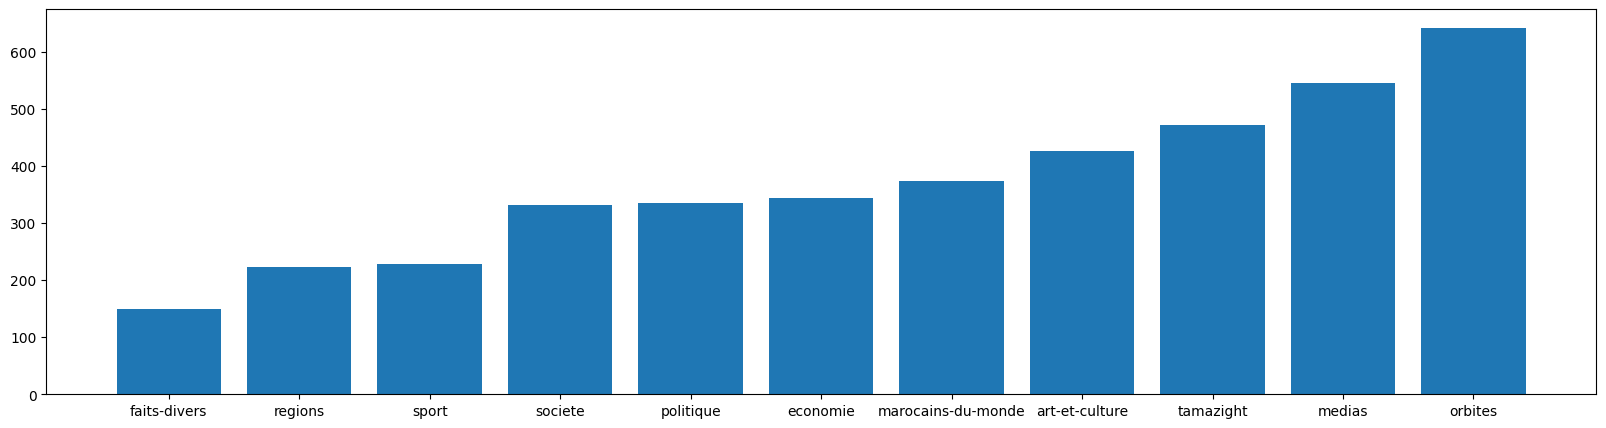

In [89]:
plt.figure(figsize=(20 , 5))
plt.bar(x = df_len_word.topics ,  height=df_len_word.avg_len_word )